In [2]:
import pandas as pd
from ekonlpy.sentiment import MPCK
import re

In [3]:
doctorrock_label = pd.read_csv('doctorrock_label.csv',index_col = 0)
bondreport_label = pd.read_csv('bondreport_label.csv',index_col = 0)
news_ngrams_label = pd.read_csv('news_ngrams_withNone.csv',index_col = 0)
news_tokens_label = pd.read_csv('news_tokens_withNone.csv',index_col = 0)

In [4]:
bond_doctor = doctorrock_label.append(bondreport_label, ignore_index =  True).append(news_tokens_label, ignore_index =  True).append(news_ngrams_label, ignore_index =  True)
len(bond_doctor)

464726

In [5]:
bond_doctor.head()

date                                             tokens  \
0  2005-06-09  ['경제/NNG', '경제/NNG', '비해/VV', '더/MAG', '낫/VV',...   
1  2005-06-09  ['환율/NNG', '장기/NNG', '각국/NNG', '기초/NNG', '경제/N...   
2  2005-06-09  ['유로존/NNG', '경제/NNG', '성장/NNG', '실적/NNG', '예상/...   
3  2005-06-09  ['금리/NNG', '수준/NNG', '유지/NNG', '되/XSV', '금리/NN...   
4  2005-06-09  ['실물/NNG', '경제/NNG', '시차/NNG', '두/VV', '밀접/NNG...   

                                              ngrams label  
0  ['엔달러/NNG;환율/NNG;상승/NNG', '기대/NNG;원화/NNG;절상/NN...   neg  
1  ['원엔/NNG;환율/NNG;하락/NNG', '일시적/VAX;외부충격/NNG', '...   neg  
2  ['유로존/NNG;경제/NNG;성장/NNG', '실적/NNG;예상/NNG;저조/NN...   neg  
3  ['자본/NNG;유출/NNG;확대/NNG', '금리/NNG;상승/NNG', '원화/...   neg  
4                                                 []   neg

In [6]:
len(bond_doctor['tokens'])

464726

In [7]:
def stopPos(df):
    for idx in range(len(df['tokens'])):
        if df['tokens'][idx] == '[]':
            continue
        else:
            df['tokens'][idx] = re.sub(r'\'\S+\/(SC|SY|SF|SE|SS|SP|SO|SW|SSC\
                               |JKS|JKC|JKG|JKO|JKB|JKV|JKQ|JX|JC\
                               |EF|EC|ETN|ETM)\'\,?\s?','', df['tokens'][idx])
        if idx%1000==0:
            print(idx)
    return df

In [8]:
bond_doctor = stopPos(bond_doctor)
bond_doctor.head()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
159000

date                                             tokens  \
0  2005-06-09  ['경제/NNG', '경제/NNG', '비해/VV', '더/MAG', '낫/VV',...   
1  2005-06-09  ['환율/NNG', '장기/NNG', '각국/NNG', '기초/NNG', '경제/N...   
2  2005-06-09  ['유로존/NNG', '경제/NNG', '성장/NNG', '실적/NNG', '예상/...   
3  2005-06-09  ['금리/NNG', '수준/NNG', '유지/NNG', '되/XSV', '금리/NN...   
4  2005-06-09  ['실물/NNG', '경제/NNG', '시차/NNG', '두/VV', '밀접/NNG...   

                                              ngrams label  
0  ['엔달러/NNG;환율/NNG;상승/NNG', '기대/NNG;원화/NNG;절상/NN...   neg  
1  ['원엔/NNG;환율/NNG;하락/NNG', '일시적/VAX;외부충격/NNG', '...   neg  
2  ['유로존/NNG;경제/NNG;성장/NNG', '실적/NNG;예상/NNG;저조/NN...   neg  
3  ['자본/NNG;유출/NNG;확대/NNG', '금리/NNG;상승/NNG', '원화/...   neg  
4                                                 []   neg

In [9]:
def selectFeat(df):
    allTokens=[]
    allNgrams=[]
    
    num=0
    for item in df['tokens']:
        li = eval(item)
        allTokens.extend(li)
        num+=1
        if num%1000==0:
            print('tokens {}번째까지 병합완료'.format(num))
    tokens15 = list(pd.Series(allTokens).value_counts()[pd.Series(allTokens).value_counts() >= 15].index)
    print('tokens에서 15회 이상 엔그램 추출완료')
    
    num=0
    for item in df['ngrams']:
        li = eval(item)
        allNgrams.extend(li)
        num+=1
        if num%1000==0:
            print('ngrams {}번째까지 병합완료'.format(num))
    ngrams15 = list(pd.Series(allNgrams).value_counts()[pd.Series(allNgrams).value_counts() >= 15].index)
    print('ngrams에서 15회 이상 엔그램 추출완료')

    return tokens15+ngrams15

In [10]:
ngrams_over15 = selectFeat(bond_doctor)
len(ngrams_over15)

tokens 1000번째까지 병합완료
tokens 2000번째까지 병합완료
tokens 3000번째까지 병합완료
tokens 4000번째까지 병합완료
tokens 5000번째까지 병합완료
tokens 6000번째까지 병합완료
tokens 7000번째까지 병합완료
tokens 8000번째까지 병합완료
tokens 9000번째까지 병합완료
tokens 10000번째까지 병합완료
tokens 11000번째까지 병합완료
tokens 12000번째까지 병합완료
tokens 13000번째까지 병합완료
tokens 14000번째까지 병합완료
tokens 15000번째까지 병합완료
tokens 16000번째까지 병합완료
tokens 17000번째까지 병합완료
tokens 18000번째까지 병합완료
tokens 19000번째까지 병합완료
tokens 20000번째까지 병합완료
tokens 21000번째까지 병합완료
tokens 22000번째까지 병합완료
tokens 23000번째까지 병합완료
tokens 24000번째까지 병합완료
tokens 25000번째까지 병합완료
tokens 26000번째까지 병합완료
tokens 27000번째까지 병합완료
tokens 28000번째까지 병합완료
tokens 29000번째까지 병합완료
tokens 30000번째까지 병합완료
tokens 31000번째까지 병합완료
tokens 32000번째까지 병합완료
tokens 33000번째까지 병합완료
tokens 34000번째까지 병합완료
tokens 35000번째까지 병합완료
tokens 36000번째까지 병합완료
tokens 37000번째까지 병합완료
tokens 38000번째까지 병합완료
tokens 39000번째까지 병합완료
tokens 40000번째까지 병합완료
tokens 41000번째까지 병합완료
tokens 42000번째까지 병합완료
tokens 43000번째까지 병합완료
tokens 44000번째까지 병합완료
tokens 45000번째까지 병합완료
tokens 46000번째까지 병합

tokens 377000번째까지 병합완료
tokens 378000번째까지 병합완료
tokens 379000번째까지 병합완료
tokens 380000번째까지 병합완료
tokens 381000번째까지 병합완료
tokens 382000번째까지 병합완료
tokens 383000번째까지 병합완료
tokens 384000번째까지 병합완료
tokens 385000번째까지 병합완료
tokens 386000번째까지 병합완료
tokens 387000번째까지 병합완료
tokens 388000번째까지 병합완료
tokens 389000번째까지 병합완료
tokens 390000번째까지 병합완료
tokens 391000번째까지 병합완료
tokens 392000번째까지 병합완료
tokens 393000번째까지 병합완료
tokens 394000번째까지 병합완료
tokens 395000번째까지 병합완료
tokens 396000번째까지 병합완료
tokens 397000번째까지 병합완료
tokens 398000번째까지 병합완료
tokens 399000번째까지 병합완료
tokens 400000번째까지 병합완료
tokens 401000번째까지 병합완료
tokens 402000번째까지 병합완료
tokens 403000번째까지 병합완료
tokens 404000번째까지 병합완료
tokens 405000번째까지 병합완료
tokens 406000번째까지 병합완료
tokens 407000번째까지 병합완료
tokens 408000번째까지 병합완료
tokens 409000번째까지 병합완료
tokens 410000번째까지 병합완료
tokens 411000번째까지 병합완료
tokens 412000번째까지 병합완료
tokens 413000번째까지 병합완료
tokens 414000번째까지 병합완료
tokens 415000번째까지 병합완료
tokens 416000번째까지 병합완료
tokens 417000번째까지 병합완료
tokens 418000번째까지 병합완료
tokens 419000번째까지 병합완료
tokens 4200

ngrams 274000번째까지 병합완료
ngrams 275000번째까지 병합완료
ngrams 276000번째까지 병합완료
ngrams 277000번째까지 병합완료
ngrams 278000번째까지 병합완료
ngrams 279000번째까지 병합완료
ngrams 280000번째까지 병합완료
ngrams 281000번째까지 병합완료
ngrams 282000번째까지 병합완료
ngrams 283000번째까지 병합완료
ngrams 284000번째까지 병합완료
ngrams 285000번째까지 병합완료
ngrams 286000번째까지 병합완료
ngrams 287000번째까지 병합완료
ngrams 288000번째까지 병합완료
ngrams 289000번째까지 병합완료
ngrams 290000번째까지 병합완료
ngrams 291000번째까지 병합완료
ngrams 292000번째까지 병합완료
ngrams 293000번째까지 병합완료
ngrams 294000번째까지 병합완료
ngrams 295000번째까지 병합완료
ngrams 296000번째까지 병합완료
ngrams 297000번째까지 병합완료
ngrams 298000번째까지 병합완료
ngrams 299000번째까지 병합완료
ngrams 300000번째까지 병합완료
ngrams 301000번째까지 병합완료
ngrams 302000번째까지 병합완료
ngrams 303000번째까지 병합완료
ngrams 304000번째까지 병합완료
ngrams 305000번째까지 병합완료
ngrams 306000번째까지 병합완료
ngrams 307000번째까지 병합완료
ngrams 308000번째까지 병합완료
ngrams 309000번째까지 병합완료
ngrams 310000번째까지 병합완료
ngrams 311000번째까지 병합완료
ngrams 312000번째까지 병합완료
ngrams 313000번째까지 병합완료
ngrams 314000번째까지 병합완료
ngrams 315000번째까지 병합완료
ngrams 316000번째까지 병합완료
ngrams 3170

52640

In [11]:
def polarScore(df, lst):
    posDf = df[df['label']=='pos']
    negDf = df[df['label']=='neg']
    print('라벨에 따른 의사록 데이터프레임 분류완료')
    
    allPosTokens=[]
    allNegTokens=[]
    allPosNgrams=[]
    allNegNgrams=[]
    
    for item in posDf['tokens']:
        li = eval(item)
        allPosTokens.extend(li)
    print('pos라벨 tokens병합완료')
    
    for item in posDf['ngrams']:
        li = eval(item)
        allPosNgrams.extend(li)
    print('pos라벨 ngrams병합완료')
    
    allPos = allPosTokens+allPosNgrams

    for item in negDf['tokens']:
        li = eval(item)
        allNegTokens.extend(li)
    print('neg라벨 tokens병합완료')
        
    for item in negDf['ngrams']:
        li = eval(item)
        allNegNgrams.extend(li)
    print('neg라벨 ngrams병합완료')
    
    allNeg = allNegTokens+allNegNgrams
    
    pos_cnt = len(allPos)
    neg_cnt = len(allNeg)
    
    # polarity score 산출
    pos_list=[]
    neg_list=[]
    
    allPos_valuecounts = pd.Series(allPos).value_counts()
    allNeg_valuecounts = pd.Series(allNeg).value_counts()
    
    print('중간준비 완료')
    
    i=0
    for ngram in lst:
        
        if ngram not in allNeg_valuecounts.index and ngram not in allPos_valuecounts.index:
            score = 1
        elif ngram not in allNeg_valuecounts.index:
            score = (allPos_valuecounts[ngram]/pos_cnt) / (1/neg_cnt)
        elif ngram not in allPos_valuecounts.index:
            score = 0
        else:
            score = (allPos_valuecounts[ngram]/pos_cnt) / (allNeg_valuecounts[ngram]/neg_cnt)
            
        if score >= 1.3:
            pos_list.append(ngram)
        elif score <= (1/1.3):
            neg_list.append(ngram)
            
        i+=1
        if i%1000==0:
            print('{}번째 진행완료 / 총 {}개'.format(i, len(lst)))
            
    return pos_list, neg_list


In [12]:
pos_list, neg_list = polarScore(bond_doctor, ngrams_over15)
pos_list[:10], neg_list[:10]

라벨에 따른 의사록 데이터프레임 분류완료
pos라벨 tokens병합완료
pos라벨 ngrams병합완료
neg라벨 tokens병합완료
neg라벨 ngrams병합완료
중간준비 완료
1000번째 진행완료 / 총 52640개
2000번째 진행완료 / 총 52640개
3000번째 진행완료 / 총 52640개
4000번째 진행완료 / 총 52640개
5000번째 진행완료 / 총 52640개
6000번째 진행완료 / 총 52640개
7000번째 진행완료 / 총 52640개
8000번째 진행완료 / 총 52640개
9000번째 진행완료 / 총 52640개
10000번째 진행완료 / 총 52640개
11000번째 진행완료 / 총 52640개
12000번째 진행완료 / 총 52640개
13000번째 진행완료 / 총 52640개
14000번째 진행완료 / 총 52640개
15000번째 진행완료 / 총 52640개
16000번째 진행완료 / 총 52640개
17000번째 진행완료 / 총 52640개
18000번째 진행완료 / 총 52640개
19000번째 진행완료 / 총 52640개
20000번째 진행완료 / 총 52640개
21000번째 진행완료 / 총 52640개
22000번째 진행완료 / 총 52640개
23000번째 진행완료 / 총 52640개
24000번째 진행완료 / 총 52640개
25000번째 진행완료 / 총 52640개
26000번째 진행완료 / 총 52640개
27000번째 진행완료 / 총 52640개
28000번째 진행완료 / 총 52640개
29000번째 진행완료 / 총 52640개
30000번째 진행완료 / 총 52640개
31000번째 진행완료 / 총 52640개
32000번째 진행완료 / 총 52640개
33000번째 진행완료 / 총 52640개
34000번째 진행완료 / 총 52640개
35000번째 진행완료 / 총 52640개
36000번째 진행완료 / 총 52640개
37000번째 진행완료 / 총 52640개
38000번째 진행완료 / 총 52640

(['빠르/VA',
  '뉴스/NNG',
  '위안/NNG',
  '기사/NNG',
  '긴축/NNG',
  '콜/NNG',
  '절상/NNG',
  '무료/NNG',
  '프리미엄/NNG',
  '추천/NNG'],
 ['인하/NNG',
  '침체/NNG',
  '브렉시트/NNG',
  '금융위기/NNG',
  '구조조정/NNG',
  '클릭/NNG',
  '부양/NNG',
  '안전자산/NNG',
  '부양책/NNG',
  '은행채/NNG'])

In [13]:
pos_df = pd.DataFrame({'pos':pos_list})
neg_df = pd.DataFrame({'neg':neg_list})


In [14]:
pos_df.to_csv('pos_df.csv',encoding = 'cp949')
neg_df.to_csv('neg_df.csv',encoding = 'cp949')

In [15]:
len(pos_list),len(neg_list)

(14088, 16117)

In [16]:
def get_stTone(df, pos_tup, neg_tup):
    df['SentenceTone']=None
    for idx in range(len(df)):
        pos_cnt = 0
        neg_cnt = 0
        li = eval((df['tokens']+df['ngrams'])[idx].replace('][',''))
        for item in li:
            if item in pos_tup:
                pos_cnt += 1
            elif item in neg_tup:
                neg_cnt += 1
        if (pos_cnt+neg_cnt) == 0:
            stTone = 0
        else:
            stTone = (pos_cnt-neg_cnt) / (pos_cnt+neg_cnt)
        df['SentenceTone'][idx] = stTone
    if idx%30==0:
        print(idx)
    return df

In [17]:
new_doctorrock = get_stTone(doctorrock_label, pos_list, neg_list)
new_doctorrock.head()

date                                             tokens  \
0  2005-06-09  ['경제/NNG', '경제/NNG', '비해/VV', '더/MAG', '낫/VV',...   
1  2005-06-09  ['환율/NNG', '장기/NNG', '각국/NNG', '기초/NNG', '경제/N...   
2  2005-06-09  ['유로존/NNG', '경제/NNG', '성장/NNG', '실적/NNG', '예상/...   
3  2005-06-09  ['금리/NNG', '수준/NNG', '유지/NNG', '되/XSV', '금리/NN...   
4  2005-06-09  ['실물/NNG', '경제/NNG', '시차/NNG', '두/VV', '밀접/NNG...   

                                              ngrams label SentenceTone  
0  ['엔달러/NNG;환율/NNG;상승/NNG', '기대/NNG;원화/NNG;절상/NN...   neg     0.714286  
1  ['원엔/NNG;환율/NNG;하락/NNG', '일시적/VAX;외부충격/NNG', '...   neg           -1  
2  ['유로존/NNG;경제/NNG;성장/NNG', '실적/NNG;예상/NNG;저조/NN...   neg           -1  
3  ['자본/NNG;유출/NNG;확대/NNG', '금리/NNG;상승/NNG', '원화/...   neg            1  
4                                                 []   neg           -1

In [18]:
def get_drTone(df):
    dr_tone_lst = []
    unq_date = sorted((list(set(df['date']))))
    for date in unq_date:
        target = df[df['date']==date]
        hawk_cnt = len(target[target['SentenceTone'] > 0])
        dove_cnt = len(target[target['SentenceTone'] < 0])
        dr_tone = (hawk_cnt - dove_cnt) / (hawk_cnt + dove_cnt)
        dr_tone_lst.append([date, dr_tone])
    return pd.DataFrame(dr_tone_lst, columns=['의사록날짜','톤 스코어'])

In [19]:
result = get_drTone(new_doctorrock)
result.head()

의사록날짜     톤 스코어
0  2005-06-09 -0.500000
1  2005-07-07 -0.500000
2  2005-08-11  0.454545
3  2005-09-08 -0.500000
4  2005-10-11  0.000000

(-2, 2)

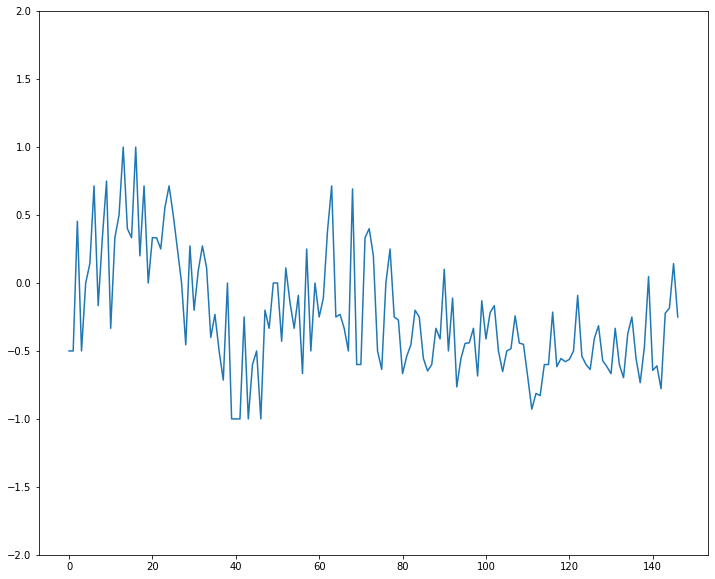

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(result['톤 스코어'])
plt.ylim(-2,2)

In [22]:
sr = pd.read_json('기준금리.json')
sorted_sr = sr.sort_values(by=['date'], axis=0)
sorted_sr.index = range(len(sorted_sr))
sorted_sr['date'] = pd.to_datetime(sorted_sr['date'],format = '%Y%m%d')
new_df = pd.DataFrame({'date' : pd.date_range('20041111','20171231')})
base_rate = new_df.merge(sorted_sr, on = 'date', how = 'left').fillna(method='ffill')[51:]
base_rate.index = range(len(base_rate))
base_rate.head()

date  baseRate
0 2005-01-01      3.25
1 2005-01-02      3.25
2 2005-01-03      3.25
3 2005-01-04      3.25
4 2005-01-05      3.25

In [23]:
new_df = pd.DataFrame({'의사록날짜' : pd.date_range('20050101','20171231')})
result['의사록날짜'] = pd.to_datetime(result['의사록날짜'])
result2 = new_df.merge(result, on = '의사록날짜', how = 'left').fillna(method='bfill')
result2.columns = ['date','톤 스코어']
result2.head()

date  톤 스코어
0 2005-01-01   -0.5
1 2005-01-02   -0.5
2 2005-01-03   -0.5
3 2005-01-04   -0.5
4 2005-01-05   -0.5

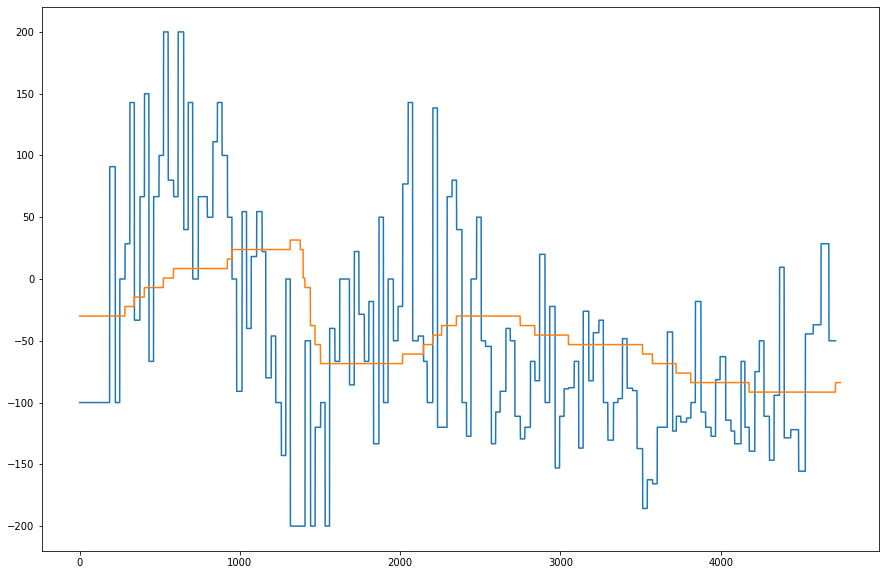

In [24]:
plt.figure(figsize=(15,10))
plt.plot(result2['톤 스코어']/result2['톤 스코어'][0]*(-100))
plt.plot(base_rate['baseRate']/base_rate['baseRate'][0]*100-130)

# 채권보고서, 의사록만 이용한 부분 ->

In [104]:
result = get_drTone(new_doctorrock)
result.head()

의사록날짜     톤 스코어
0  2005-06-09 -0.666667
1  2005-07-07 -0.142857
2  2005-08-11  0.375000
3  2005-09-08 -0.384615
4  2005-10-11 -0.111111

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

(-2, 2)

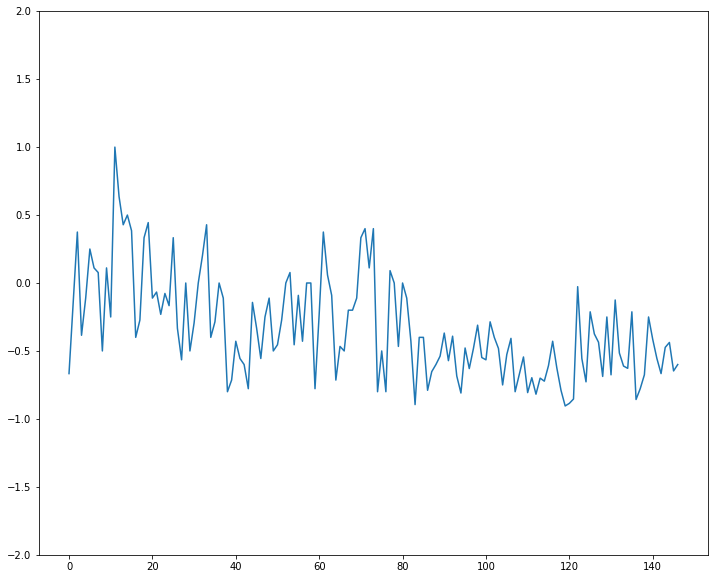

In [179]:
plt.figure(figsize=(12,10))
plt.plot(result['톤 스코어'])
plt.ylim(-2,2)

## 기준금리 데이터프레임화

### 기준금리 합치기

In [236]:
sr = pd.read_json('기준금리.json')
sorted_sr = sr.sort_values(by=['date'], axis=0)
sorted_sr.index = range(len(sorted_sr))
sorted_sr['date'] = pd.to_datetime(sorted_sr['date'],format = '%Y%m%d')
new_df = pd.DataFrame({'date' : pd.date_range('20041111','20171231')})
base_rate = new_df.merge(sorted_sr, on = 'date', how = 'left').fillna(method='ffill')[51:]
base_rate.index = range(len(base_rate))
base_rate.head()

date  baseRate
0 2005-01-01      3.25
1 2005-01-02      3.25
2 2005-01-03      3.25
3 2005-01-04      3.25
4 2005-01-05      3.25

(-3, 9)

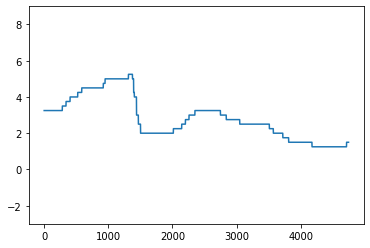

In [183]:
plt.plot(base_rate['baseRate'])
plt.ylim(-3,9)

### 의사록 fillna(bfill)

In [217]:
new_df = pd.DataFrame({'의사록날짜' : pd.date_range('20050101','20171231')})
result['의사록날짜'] = pd.to_datetime(result['의사록날짜'])
result2 = new_df.merge(result, on = '의사록날짜', how = 'left').fillna(method='bfill')
result2.columns = ['date','톤 스코어']
result2.head()

date     톤 스코어
0 2005-01-01 -0.666667
1 2005-01-02 -0.666667
2 2005-01-03 -0.666667
3 2005-01-04 -0.666667
4 2005-01-05 -0.666667

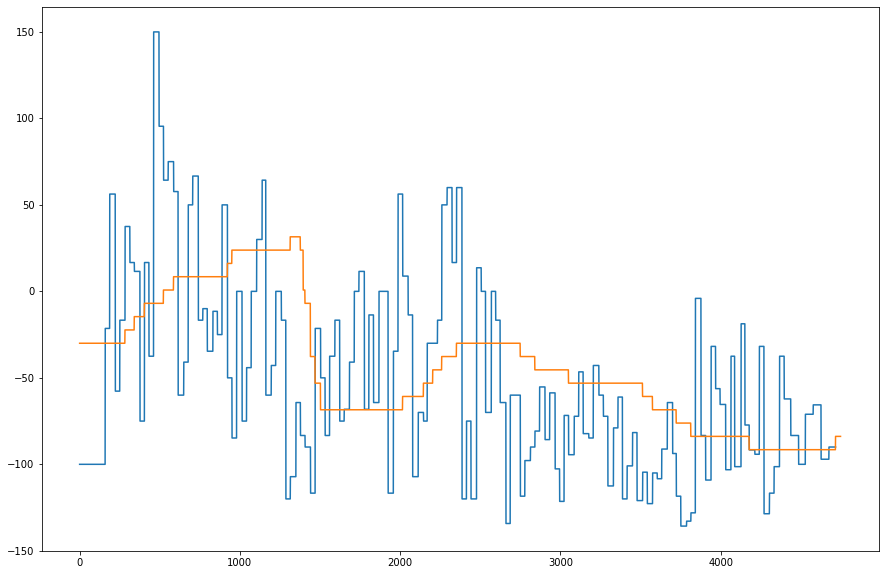

In [216]:
plt.figure(figsize=(15,10))
plt.plot(result2['톤 스코어']/result2['톤 스코어'][0]*(-100))
plt.plot(base_rate['baseRate']/base_rate['baseRate'][0]*100-130)
# plt.legend(['톤','기준금리'])
# plt.ylim(-2,2)

# <- 채권보고서, 의사록만 사용한 부분 끝

In [25]:
df = pd.DataFrame({'기준금리':base_rate['baseRate'],
             '의사록톤':result2['톤 스코어']})

In [27]:
df.corr('pearson')

기준금리      의사록톤
기준금리  1.000000  0.361642
의사록톤  0.361642  1.000000

In [29]:
result.columns = ['date','톤스코어']
result.head()

date      톤스코어
0 2005-06-09 -0.500000
1 2005-07-07 -0.500000
2 2005-08-11  0.454545
3 2005-09-08 -0.500000
4 2005-10-11  0.000000

In [31]:
base_rate.head()

date  baseRate
0 2005-01-01      3.25
1 2005-01-02      3.25
2 2005-01-03      3.25
3 2005-01-04      3.25
4 2005-01-05      3.25

In [33]:
df = result.merge(base_rate, on='date', how='left')
df.head()

date      톤스코어  baseRate
0 2005-06-09 -0.500000      3.25
1 2005-07-07 -0.500000      3.25
2 2005-08-11  0.454545      3.25
3 2005-09-08 -0.500000      3.25
4 2005-10-11  0.000000      3.50

In [34]:
df.corr('pearson')

톤스코어  baseRate
톤스코어      1.000000  0.415041
baseRate  0.415041  1.000000